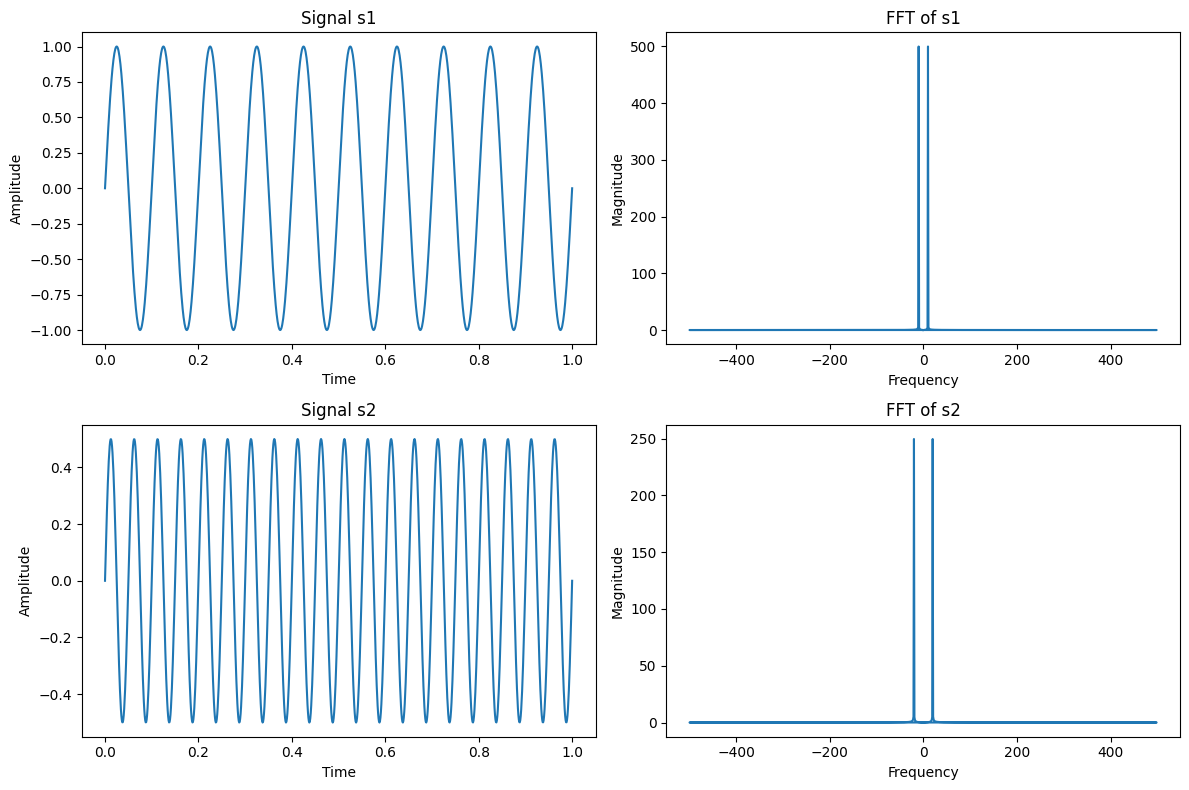

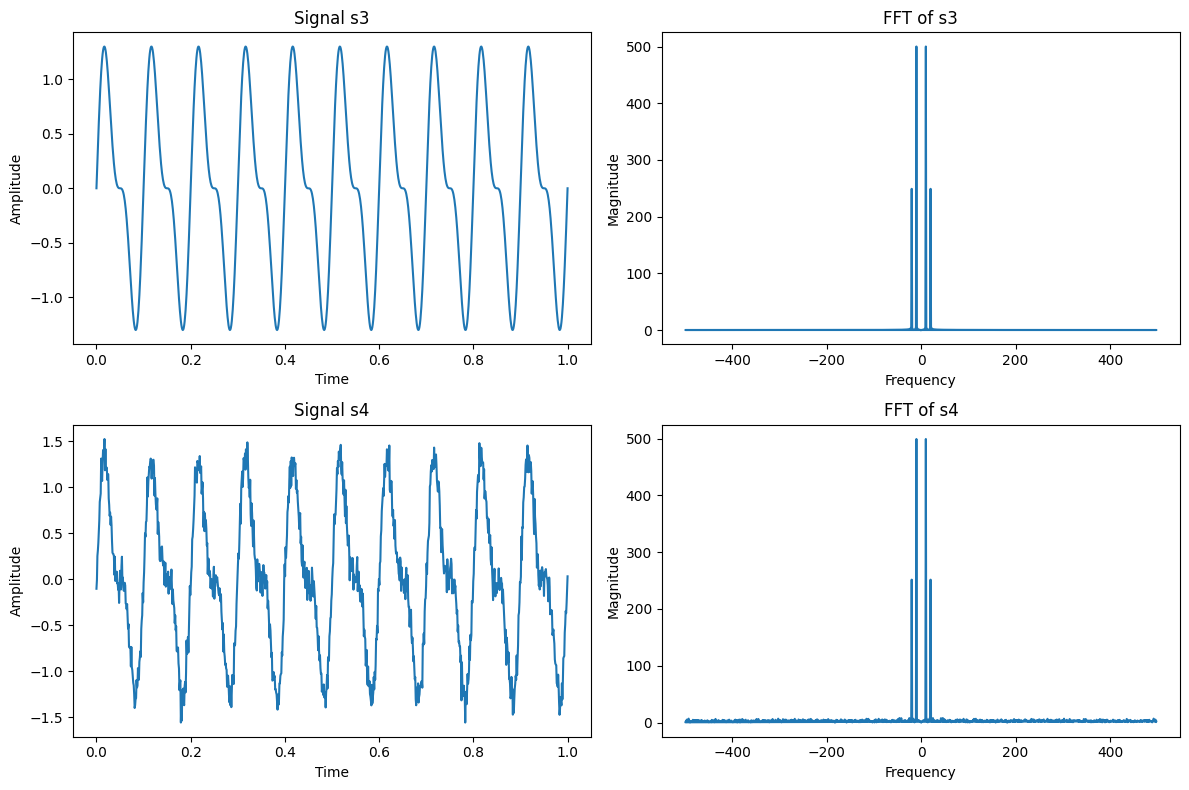

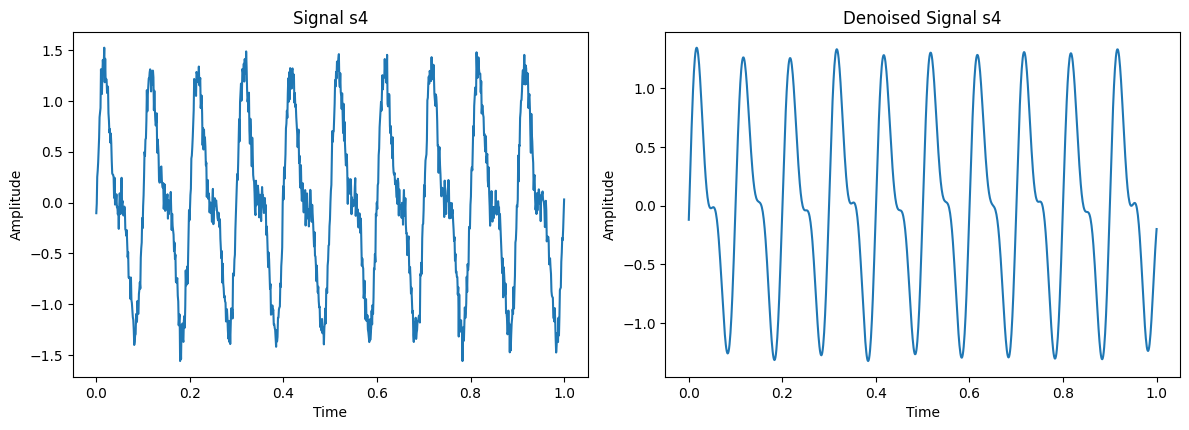

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import butter, filtfilt

# Given signals
t = np.linspace(0, 1, 1000)  # Time axis
frequency_1 = 10  # Frequency of s1
frequency_2 = 20  # Frequency of s2
amplitude_1 = 1.0  # Amplitude of s1
amplitude_2 = 0.5  # Amplitude of s2

s1 = amplitude_1 * np.sin(2 * np.pi * frequency_1 * t)
s2 = amplitude_2 * np.sin(2 * np.pi * frequency_2 * t)

# Calculate s3 = s1 + s2
s3 = s1 + s2

# Plot s1 and its FFT
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, s1)
plt.title('Signal s1')
plt.xlabel('Time')
plt.ylabel('Amplitude')

s1_fft = fft(s1)
freq = fftfreq(len(t), t[1] - t[0])
plt.subplot(2, 2, 2)
plt.plot(freq, np.abs(s1_fft))
plt.title('FFT of s1')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Plot s2 and its FFT
plt.subplot(2, 2, 3)
plt.plot(t, s2)
plt.title('Signal s2')
plt.xlabel('Time')
plt.ylabel('Amplitude')

s2_fft = fft(s2)
plt.subplot(2, 2, 4)
plt.plot(freq, np.abs(s2_fft))
plt.title('FFT of s2')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Plot s3 and its FFT
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, s3)
plt.title('Signal s3')
plt.xlabel('Time')
plt.ylabel('Amplitude')

s3_fft = fft(s3)
plt.subplot(2, 2, 2)
plt.plot(freq, np.abs(s3_fft))
plt.title('FFT of s3')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

# Adding random noise to s3
random_noise = np.random.normal(0, 0.1, len(s3))
s4 = s3 + random_noise

# Plot s4 and its FFT
plt.subplot(2, 2, 3)
plt.plot(t, s4)
plt.title('Signal s4')
plt.xlabel('Time')
plt.ylabel('Amplitude')

s4_fft = fft(s4)
plt.subplot(2, 2, 4)
plt.plot(freq, np.abs(s4_fft))
plt.title('FFT of s4')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

# Remove random noise from s4 using FFT analysis
s4_fft[np.abs(s4_fft) < 0.5 * np.max(np.abs(s4_fft))] = 0  # Set small FFT coefficients to zero
s4_clean = np.real(ifft(s4_fft))

# Denoise s4 using Butterworth filter
def butterworth_filter(data, cutoff_freq, sampling_freq, order=5):
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff = cutoff_freq / nyquist_freq
    b, a = butter(order, normalized_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

cutoff_frequency = 30  # Define your desired cutoff frequency here
sampling_frequency = 1000  # Define your sampling frequency here

s4_denoised = butterworth_filter(s4, cutoff_frequency, sampling_frequency)

# Plot s4 and its denoised version
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(t, s4)
plt.title('Signal s4')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(2, 2, 2)
plt.plot(t, s4_denoised)
plt.title('Denoised Signal s4')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
